<div class="alert alert-block alert-info"> <b>Importing the Libraries</b> </div>



In [1]:
# Importing the libraries

import pandas as pd
import numpy as np
import matplotlib as plt
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import pyplot as plt
import scipy.stats as st
import warnings
import time
import calendar
%matplotlib inline

<div class="alert alert-info"><b>Exploratory Data Analysis<b></div>

In [2]:
# Reading the dataset from the desktop
df = pd.read_csv(r"C:\Users\User\Desktop\kickstarter\kickstarter_projects.csv")
df.head()

,ID,Name,Category,Subcategory,Country,Launched,Deadline,Goal,Pledged,Backers,State
0,1860890148,Grace Jones Does Not Give A F$#% T-Shirt (limi...,Fashion,Fashion,United States,21/04/2009 21:02,31/05/2009,1000,625.0,3.0,0
1,709707365,CRYSTAL ANTLERS UNTITLED MOVIE,Film & Video,Shorts,United States,23/04/2009 00:07,20/07/2009,80000,22.0,3.0,0
2,1703704063,drawing for dollars,Art,Illustration,United States,24/04/2009 21:52,03/05/2009,20,35.0,3.0,1
3,727286,Offline Wikipedia iPhone app,Technology,Software,United States,25/04/2009 17:36,14/07/2009,99,145.0,25.0,1
4,1622952265,Pantshirts,Fashion,Fashion,United States,27/04/2009 14:10,26/05/2009,1900,387.0,1.0,0


In [3]:
#Check the number of attributes and instances

df.shape

(374853, 11)

In [4]:
#Check the decsription of the dataset including the number of non-null count and the data type

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374853 entries, 0 to 374852
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   ID           374853 non-null  int64  
 1   Name         374853 non-null  object 
 2   Category     374853 non-null  object 
 3   Subcategory  374853 non-null  object 
 4   Country      374853 non-null  object 
 5   Launched     374853 non-null  object 
 6   Deadline     374853 non-null  object 
 7   Goal         374853 non-null  int64  
 8   Pledged      323043 non-null  float64
 9   Backers      323049 non-null  float64
 10  State        374853 non-null  int64  
dtypes: float64(2), int64(3), object(6)
memory usage: 31.5+ MB


Text(0.5, 1.0, 'Total Number of Projects Based on Countries')

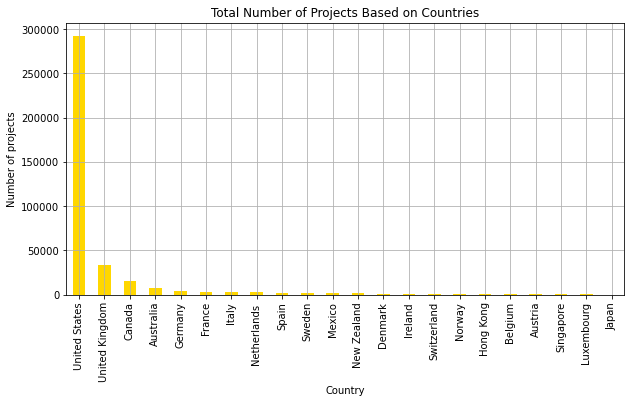

In [5]:
#EDA1 = to show the number of projects based on each country involved

plt.figure(figsize=(10,5))
df.groupby("Country").Country.count().sort_values(ascending = False).plot(kind="bar",grid =True, color = 'gold')
plt.ylabel("Number of projects")
plt.title("Total Number of Projects Based on Countries")

Text(0.5, 1.0, 'Division of Category')

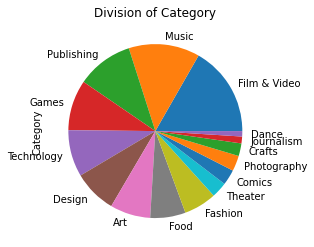

In [7]:
#EDA2 = to show the list of categories inside dataset

df_project = df["Category"].value_counts()
df_project.plot(kind = "pie")
plt.title("Division of Category")

<AxesSubplot:xlabel='State', ylabel='count'>

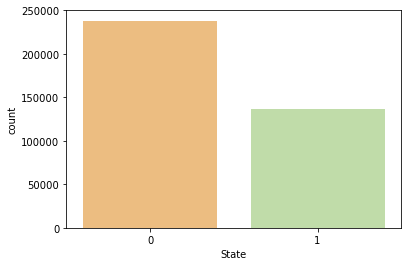

In [12]:
#EDA3 = to show the count of Failed(0) & Successful (1) in dataset 

sns.countplot(x='State', data=df, palette='Spectral')

Text(0.5, 1.0, 'Top 20 Categories Based on Number of Projects')

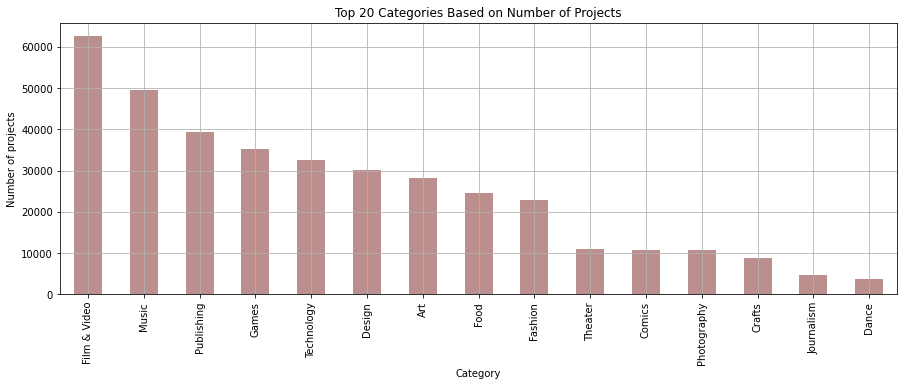

In [13]:
#EDA4 = To show the top20 categories based on the project numbers

plt.figure(figsize=(15,5))
df.groupby("Category").Category.count().sort_values(ascending = False).head(20).plot(kind= 'bar', grid = True, color='rosybrown')
plt.ylabel("Number of projects")
plt.title("Top 20 Categories Based on Number of Projects")

Text(0.5, 1.0, 'Pledged & Goal Amount on Project Status')

<Figure size 1440x720 with 0 Axes>

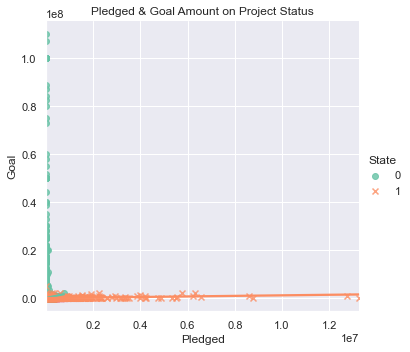

In [14]:
#EDA5 = to show the correlation between pledged amount & goal amount with the number of project failed (0) or success (1)

plt.figure(figsize=(20,10))
sns.set(style="darkgrid")
sns.lmplot(x="Pledged", y="Goal", hue='State',data=df,markers=["o", "x"], palette="Set2");
plt.title("Pledged & Goal Amount on Project Status")

<Figure size 720x1440 with 0 Axes>

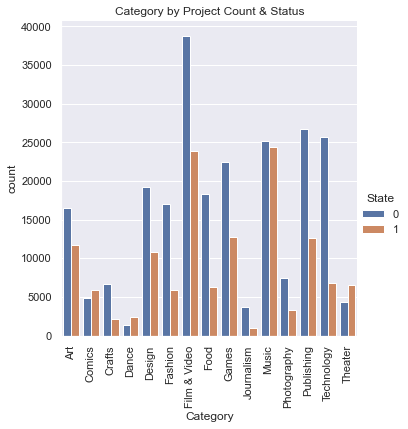

In [15]:
#EDA6 = To display the count of failed & success projects based on categories

plt.figure(figsize=(10,20))
sns.set(style="darkgrid")
sns.catplot(x='Category', hue='State', kind='count', data=df.sort_values('Category'));
plt.xticks(rotation = 90)
plt.title("Category by Project Count & Status")
plt.show()

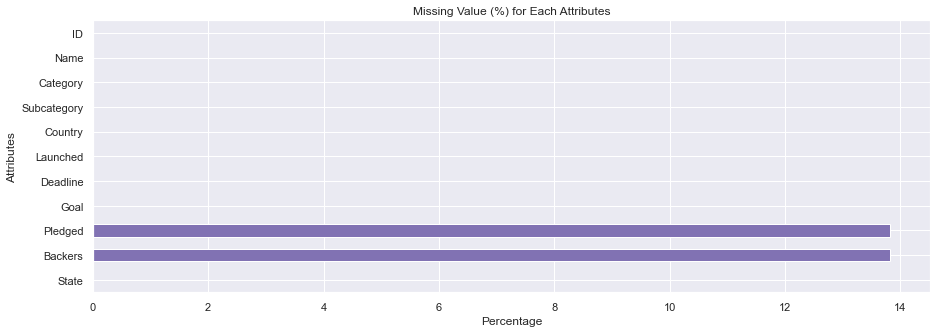

In [16]:
#EDA7 = To show the percentage% of missing value in each attribute of dataset

df.isna().mean().mul(100).iloc[::-1].plot(kind='barh', figsize=(15,5), grid=True, 
                                          title='Missing Value (%) for Each Attributes', color='m')
plt.xlabel('Percentage')
plt.ylabel('Attributes')
plt.show()

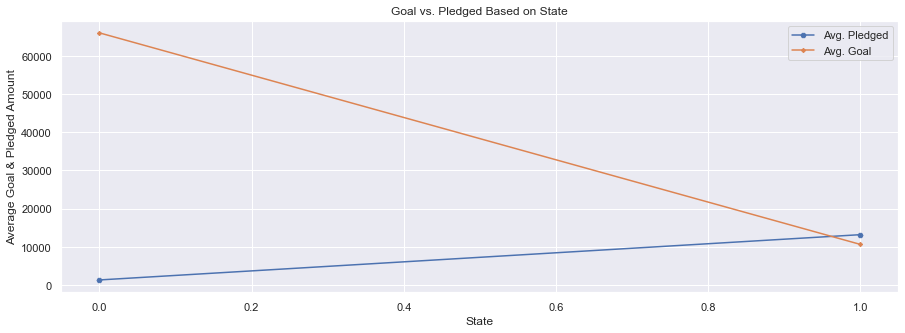

In [17]:
#EDA8 = To show the difference between Goal & Pledged Amount Based on State

avgPledged = df.groupby(['State']).agg({'Pledged' : 'mean'})
avgGoal = df.groupby(['State']).agg({'Goal' : 'mean'})
plt.figure(figsize=(15,5))
plt.plot(avgPledged,  label='Avg. Pledged', marker = 'H', markersize=5)
plt.plot(avgGoal, label='Avg. Goal', marker = 'D', markersize=3)
plt.title('Goal vs. Pledged Based on State')
plt.xlabel('State')
plt.ylabel('Average Goal & Pledged Amount')
plt.legend()
plt.show()

Text(0.5, 1.0, 'Highest Goal Amount Set Based on Countries')

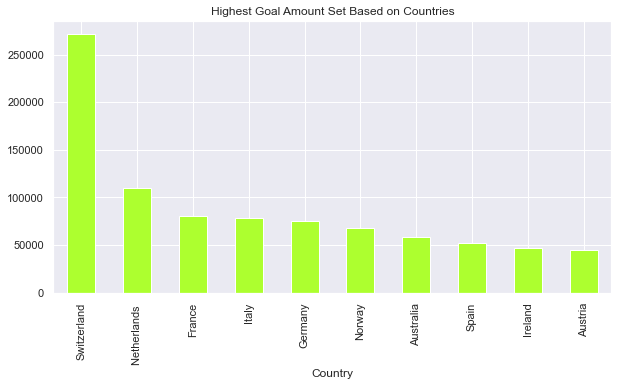

In [18]:
#EDA9 = To show which country set the highest level of goals for project

plt.figure(figsize=(10,5))
sns.set(style="darkgrid")
df.groupby('Country').Goal.mean().sort_values(ascending=False).head(10).plot.bar(color = 'greenyellow')
plt.title("Highest Goal Amount Set Based on Countries")

Text(0.5, 1.0, 'Top Pledge Supporters Based on Countries')

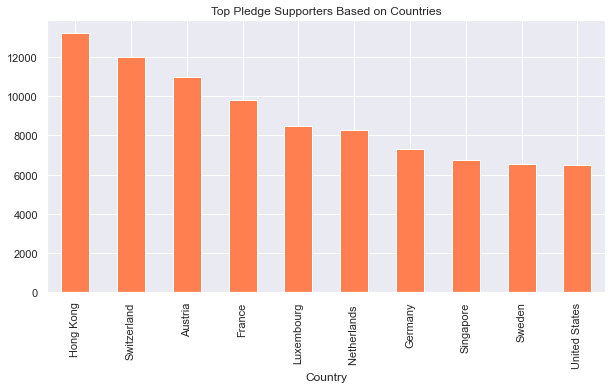

In [19]:
#EDA10 = To show which country gives the highest pledged amount of supporters

plt.figure(figsize=(10,5))
df.groupby(['Country'])['Pledged'].mean().sort_values(ascending=False).head(10).plot(kind='bar',color = 'coral',grid='yes')
plt.title("Top Pledge Supporters Based on Countries")

<div class="alert alert-info"><b>Data Pre-processing<b></div>

In [6]:
#Change the data type of the target variable into categorical 1: Success 0: Failed 

df['State'] = pd.Categorical(df.State)
df.dtypes

ID                int64
Name             object
Category         object
Subcategory      object
Country          object
Launched         object
Deadline         object
Goal              int64
Pledged         float64
Backers         float64
State          category
dtype: object

In [7]:
#Check if there is any missing values
df.isnull().any()

ID             False
Name           False
Category       False
Subcategory    False
Country        False
Launched       False
Deadline       False
Goal           False
Pledged         True
Backers         True
State          False
dtype: bool

In [8]:
#Check the number of missing values exists in the dataset 

df.isnull().values
df.isnull().values.any()
df.isnull().sum()

ID                 0
Name               0
Category           0
Subcategory        0
Country            0
Launched           0
Deadline           0
Goal               0
Pledged        51810
Backers        51804
State              0
dtype: int64

In [9]:
#Check the percentage of the missing value for each attributes

missing_data_percentage =(df.isnull().sum()/df.shape[0]) * 100
missing_data_percentage

ID              0.000000
Name            0.000000
Category        0.000000
Subcategory     0.000000
Country         0.000000
Launched        0.000000
Deadline        0.000000
Goal            0.000000
Pledged        13.821418
Backers        13.819817
State           0.000000
dtype: float64

In [10]:
# Treating the missing values by drop it from the dataset 

df1 = df.dropna()
df1.isnull().sum()

ID             0
Name           0
Category       0
Subcategory    0
Country        0
Launched       0
Deadline       0
Goal           0
Pledged        0
Backers        0
State          0
dtype: int64

In [11]:
# Remove unused attributes

df2=df1.drop(["ID", "Name", "Launched", "Deadline"], axis=1)

In [12]:
# Check the description of the updated dataset

df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 323040 entries, 0 to 374852
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype   
---  ------       --------------   -----   
 0   Category     323040 non-null  object  
 1   Subcategory  323040 non-null  object  
 2   Country      323040 non-null  object  
 3   Goal         323040 non-null  int64   
 4   Pledged      323040 non-null  float64 
 5   Backers      323040 non-null  float64 
 6   State        323040 non-null  category
dtypes: category(1), float64(2), int64(1), object(3)
memory usage: 17.6+ MB


<AxesSubplot:>

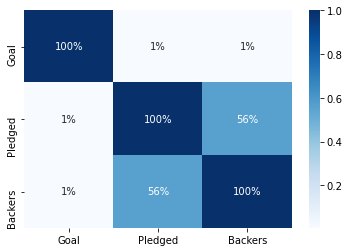

In [13]:
# Check the correlation between the numerical attributes

sns.heatmap(df2.corr(), annot=True, fmt='.0%',cmap="Blues")

In [14]:
# Check the statistical findings between the numerical attributes

df2.describe()

,Goal,Pledged,Backers
count,3.230400e+05,3.230400e+05,323040.000000
mean,3.819625e+04,6.302443e+03,97.805572
std,9.686346e+05,6.768603e+04,857.192697
min,0.000000e+00,1.000000e+00,1.000000
25%,2.000000e+03,3.600000e+01,3.000000
50%,5.500000e+03,3.450000e+02,15.000000
75%,1.526100e+04,2.362000e+03,55.000000
max,1.101698e+08,1.328523e+07,219382.000000


In [15]:
#Check the number of attributes and instances after the removal of missing values

df2.shape

(323040, 7)

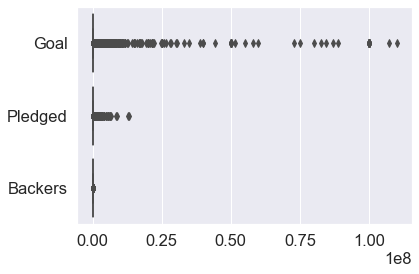

In [16]:
#Display overall box plot for Goal, Pledged & Backers

sns.set(font_scale=1.5)
ax = sns.boxplot(data=df2[['Goal', 'Pledged', 'Backers']], orient="h")

In [17]:
def find_outliers_IQR(df2):

   q1=df2.quantile(0.25)

   q3=df2.quantile(0.75)

   IQR=q3-q1

   outliers = df2[((df2<(q1-1.5*IQR)) | (df2>(q3+1.5*IQR)))]

   return outliers

In [18]:
#Show total outliers of Goal, Pledged & Backers

ol_Goal = find_outliers_IQR(df2['Goal'])
ol_Pledged = find_outliers_IQR(df2['Pledged'])
ol_Backers = find_outliers_IQR(df2['Backers'])
print('Number of Outliers for Goal: '+ str(len(ol_Goal)))
print('Number of Outliers for Pledged: '+ str(len(ol_Pledged)))
print('Number of Outliers for Backers: '+ str(len(ol_Backers)))

Number of Outliers for Goal: 37561
Number of Outliers for Pledged: 44748
Number of Outliers for Backers: 38923


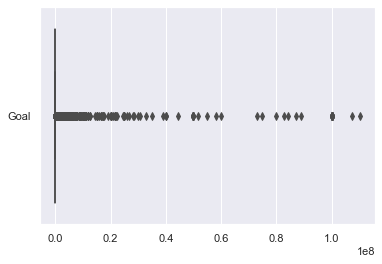

In [19]:
#Show individual plot for Goal

sns.set(font_scale=1)
ax = sns.boxplot(data=df2[['Goal']], orient="h")

In [20]:
#First quartiles (Q1), third quartiles (Q3) and Interquartiles (IQR) for Goal

Q1_Goal = df2['Goal'].quantile(0.25)
Q3_Goal = df2['Goal'].quantile(0.75)
IQR_Goal = Q3_Goal - Q1_Goal
print('First quartile (Q1) for Goal: '+ str(Q1_Goal))
print('Third quartile (Q3) for Goal: '+ str(Q3_Goal))
print('Interquartile range (IQR) for Goal: '+ str(IQR_Goal))

First quartile (Q1) for Goal: 2000.0
Third quartile (Q3) for Goal: 15261.0
Interquartile range (IQR) for Goal: 13261.0


In [21]:
#Outliers removal for Goal attribute

df3 = df2[~((df2['Goal'] < (Q1_Goal-1.5*IQR_Goal)) | (df2['Goal'] > (Q3_Goal+1.5*IQR_Goal)))]
df3.shape

(285479, 7)

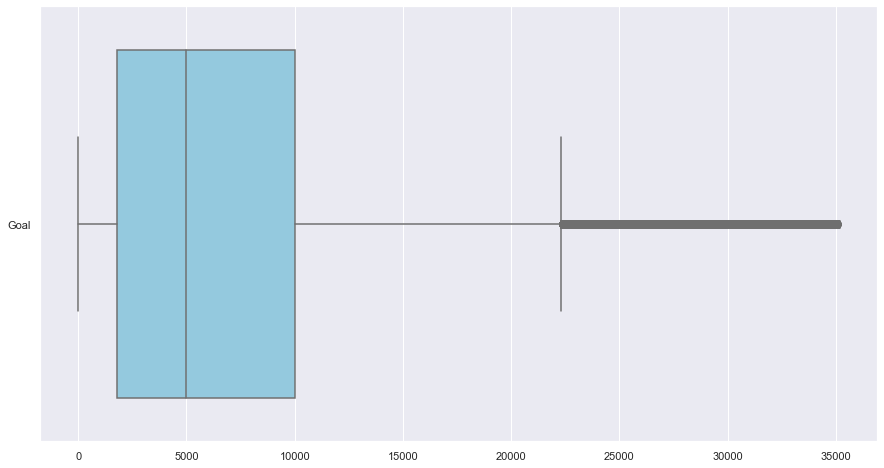

In [22]:
#Show individual plot for Goal after outlier removal

fig,axes = plt.subplots(nrows=1,ncols=1,figsize=(15,8))
sns.set(font_scale=3)
ax = sns.boxplot(data=df3[['Goal']], orient="h", color="skyblue")

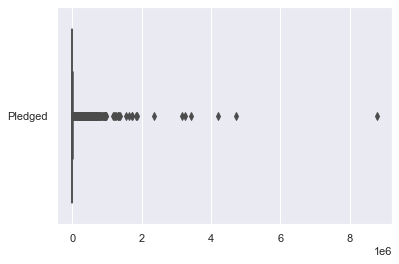

In [23]:
#Show individual plot for Pledged

sns.set(font_scale=1)
ax = sns.boxplot(data=df3[['Pledged']], orient="h")

In [24]:
#First quartiles (Q1), third quartiles (Q3) and Interquartiles (IQR) for Pledge

Q1_Pledged = df3['Pledged'].quantile(0.25)
Q3_Pledged = df3['Pledged'].quantile(0.75)
IQR_Pledged = Q3_Pledged - Q1_Pledged
print('First quartile (Q1) for Pledged: '+ str(Q1_Pledged))
print('Third quartile (Q3) for Pledged: '+ str(Q3_Pledged))
print('Interquartile range (IQR) for Pledged: '+ str(IQR_Pledged))

First quartile (Q1) for Pledged: 37.0
Third quartile (Q3) for Pledged: 2166.0
Interquartile range (IQR) for Pledged: 2129.0


In [99]:
df4 = df3[~((df3['Pledged'] < (Q1_Pledged-1.5*IQR_Pledged)) | (df3['Pledged'] > (Q3_Pledged+1.5*IQR_Pledged)))]
df4.shape

(246747, 7)

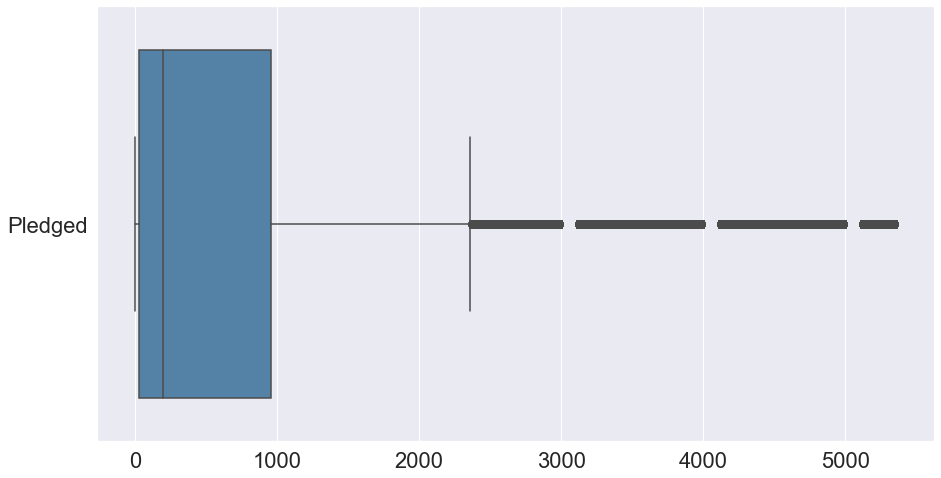

In [50]:
#Show individual plot for Pledged after outlier removal

fig,axes = plt.subplots(nrows=1,ncols=1,figsize=(15,8))
sns.set(font_scale=2)
ax = sns.boxplot(data=df4[['Pledged']], orient="h", color="steelblue")

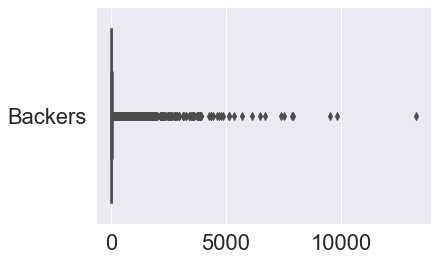

In [51]:
#Show individual plot for Backers

sns.set(font_scale=2)
ax = sns.boxplot(data=df4[['Backers']], orient="h")

In [52]:
#First quartiles (Q1), third quartiles (Q3) and Interquartiles (IQR) for Backers

Q1_Backers = df4['Backers'].quantile(0.25)
Q3_Backers = df4['Backers'].quantile(0.75)
IQR_Backers = Q3_Backers - Q1_Backers
print('First quartile (Q1) for Backers: '+ str(Q1_Backers))
print('Third quartile (Q3) for Backers: '+ str(Q3_Backers))
print('Interquartile range (IQR) for Backers: '+ str(IQR_Backers))

First quartile (Q1) for Backers: 3.0
Third quartile (Q3) for Backers: 36.0
Interquartile range (IQR) for Backers: 33.0


In [100]:
#Outliers removal for Backers attribute

df5 = df4[~((df4['Backers'] < (Q1_Backers-1.5*IQR_Backers)) | (df4['Backers'] > (Q3_Backers+1.5*IQR_Backers)))]
df5.shape

(224834, 7)

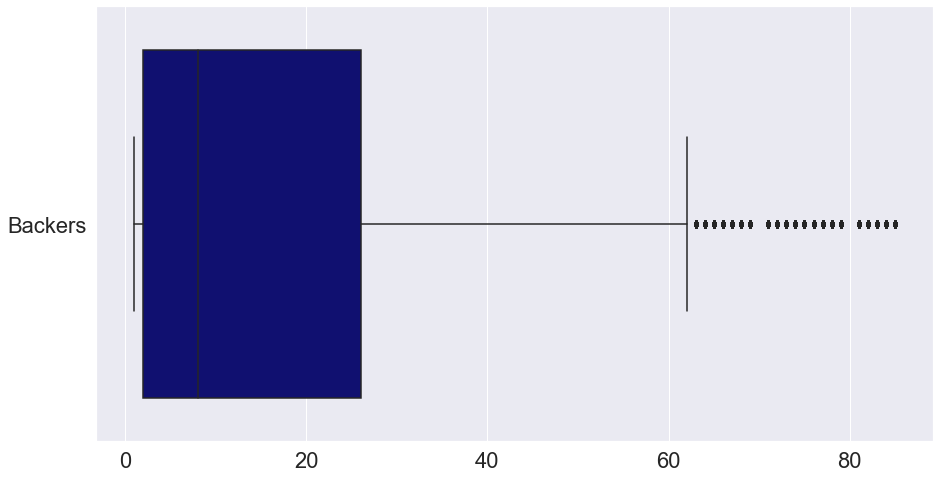

In [54]:
#Show individual plot for Pledged after outlier removal

fig,axes = plt.subplots(nrows=1,ncols=1,figsize=(15,8))
sns.set(font_scale=2)
ax = sns.boxplot(data=df5[['Backers']], orient="h", color="navy")

[Text(0.5, 1.0, 'Backers after Outliers Removal')]

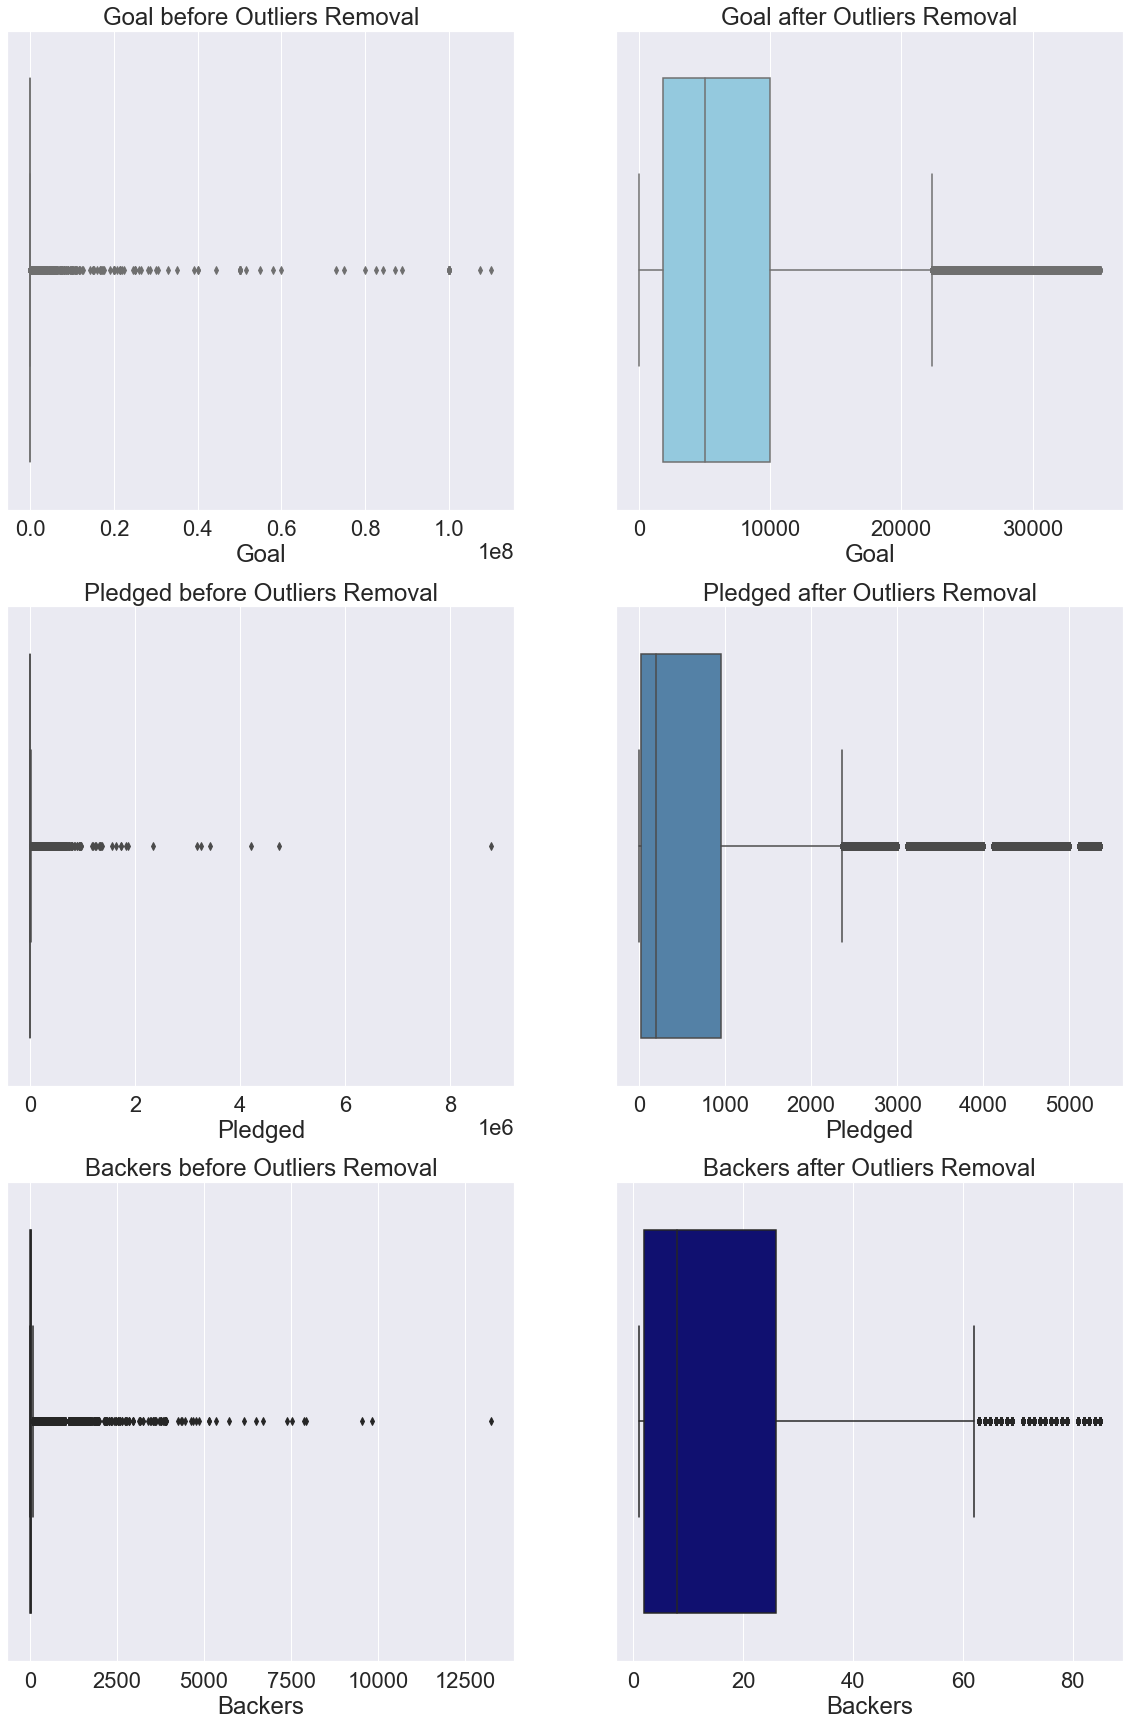

In [166]:
# Comparison of the attributes before and after the outliers removal

fig,axes = plt.subplots(nrows=3,ncols=2,figsize=(20,30))
sns.boxplot(ax=axes[0, 0], data=df2, x='Goal',color="skyblue").set(title='Goal before Outliers Removal')
sns.boxplot(ax=axes[0, 1], data=df3, x='Goal',color="skyblue").set(title='Goal after Outliers Removal')
sns.boxplot(ax=axes[1, 0], data=df3, x='Pledged',color="steelblue").set(title='Pledged before Outliers Removal')
sns.boxplot(ax=axes[1, 1], data=df4, x='Pledged',color="steelblue").set(title='Pledged after Outliers Removal')
sns.boxplot(ax=axes[2, 0], data=df4, x='Backers',color="navy").set(title='Backers before Outliers Removal')
sns.boxplot(ax=axes[2, 1], data=df5, x='Backers',color="navy").set(title='Backers after Outliers Removal')

In [35]:
from sklearn.datasets import make_classification
X, y = make_classification(n_classes=2, class_sep=0.5,
weights=[0.05, 0.95], n_informative=2, n_redundant=0, flip_y=0,
n_features=2, n_clusters_per_class=1, n_samples=1000, random_state=10)

<div class="alert alert-info"><b>Modelling Process<b></div>

In [56]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score, roc_auc_score 
import warnings 
warnings.filterwarnings('ignore')

In [104]:
#Label encoding the Country Column
Country_encoder= LabelEncoder().fit(df5['Country'])
df5['Country'] = Country_encoder.transform(df5['Country'])

#Label Encoding the Main Category Column
Category_encoder= LabelEncoder().fit(df5['Category'])
df5['Category'] = Category_encoder.transform(df5['Category'])

Subcategory_encoder= LabelEncoder().fit(df5['Subcategory'])
df5['Subcategory'] = Subcategory_encoder.transform(df5['Subcategory'])

df5.sample(10)

,Category,Subcategory,Country,Goal,Pledged,Backers,State
53611,0,114,21,5000,1545.0,28.0,0
179977,6,48,21,10000,127.0,64.0,1
365713,10,156,20,2675,27.0,68.0,1
194308,13,149,15,3944,749.0,3.0,0
45216,9,77,21,500,625.0,23.0,1
365716,0,10,21,10,12.0,1.0,1
131055,12,54,21,6600,92.0,25.0,0
116660,12,19,21,1500,1.0,1.0,0
180255,7,58,21,20000,36.0,7.0,0
252161,13,131,21,35000,1.0,1.0,0


In [105]:
#Check if the data for target label is balanced

y = df5['State']
y.value_counts()

0    148935
1     75899
Name: State, dtype: int64

In [106]:
#Defining X as dataframe for Independent features

X = df5.drop("State",axis=1)

#Defining y as Dependent Variable

y = df5["State"] 

In [107]:
from imblearn.over_sampling import SMOTE

#Using smote to balance the data
smt = SMOTE(random_state=0)
X_sm , y_sm = smt.fit_resample(X, y)

In [108]:
#Check if the data for target label is balanced

# y = df5['State']
y_sm.value_counts()

0    148935
1    148935
Name: State, dtype: int64

In [109]:
#Splitting the dataset into train and test set with the ratio of 70:30 with SMOTE


X_sm = df5.drop(['State'], axis=1)
y_sm = df5['State']
X_train_sm, X_test_sm, y_train_sm, y_test_sm = train_test_split(X_sm, y_sm, train_size=0.7, test_size=0.3, random_state=100)

In [110]:
# Applying feature scaling

sc = StandardScaler()
X_train_sm = sc.fit_transform(X_train_sm)
X_test_sm = sc.transform(X_test_sm)

<div class="alert alert-info"><b>K-Nearest Neighbour Algorithm<b></div>

In [116]:
#KNN algorithm
#Checking the optimal K value

error_rate = []
for i in range(1,15):
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(X_train_sm,y_train_sm)
 pred_i = knn.predict(X_test_sm)
 error_rate.append(np.mean(pred_i != y_test))

Minimum error:- 0.09838252953996235 at K = 8


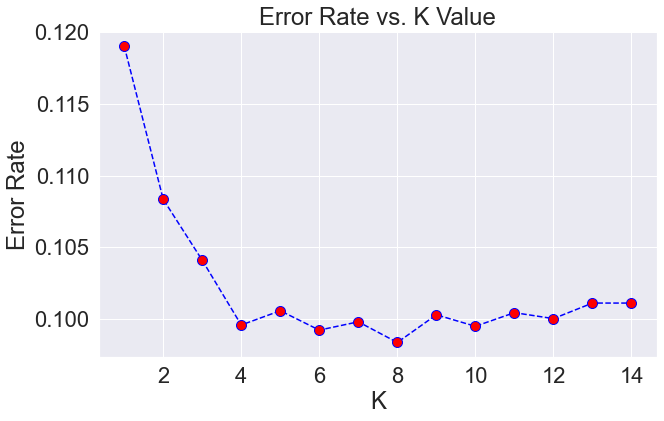

In [117]:
#Plotting the error rate for each K value

plt.figure(figsize=(10,6))
plt.plot(range(1,15),error_rate,color='blue', linestyle='dashed',marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
req_k_value = error_rate.index(min(error_rate))+1
print("Minimum error:-",min(error_rate),"at K =",req_k_value)

In [160]:
#Creating the Object for KNN

KNclassifier = KNeighborsClassifier(n_neighbors = 8)

#Fitting the data

KNclassifier.fit(X_train_sm, y_train_sm)

KNeighborsClassifier(n_neighbors=8)

In [161]:
#Predicting the Test Set

y_pred_KN_sm = KNclassifier.predict(X_test_sm)

In [162]:
#Predicting the Train set

y_pred_train_KN_sm = KNclassifier.predict(X_train_sm)

In [163]:
# Confusion Matrix for evaluating the model

print("Confusion Matrix: \n", confusion_matrix(y_test_sm, y_pred_KN_sm))

Confusion Matrix: 
 [[42542  2162]
 [ 4474 18273]]


In [164]:
#Printing accuracy for Testing set

print("Evaluation metrics for Testing set using KNN algroithm:")
print(f"Accuracy: {accuracy_score(y_test_sm, y_pred_KN_sm):.2f}")
print(f"Precision: {precision_score(y_test_sm, y_pred_KN_sm):.2f}")
print(f"Recall: {recall_score(y_test_sm, y_pred_KN_sm):.2f}")
print(f"ROC AUC Score:{roc_auc_score(y_test_sm, y_pred_KN_sm):.2f}")

Evaluation metrics for Testing set using KNN algroithm:
Accuracy: 0.90
Precision: 0.89
Recall: 0.80
ROC AUC Score:0.88


In [165]:
print("Classification Report for Testing Set using KNN:")
print(classification_report(y_test_sm, y_pred_KN_sm))

Classification Report for Testing Set using KNN:
              precision    recall  f1-score   support

           0       0.90      0.95      0.93     44704
           1       0.89      0.80      0.85     22747

    accuracy                           0.90     67451
   macro avg       0.90      0.88      0.89     67451
weighted avg       0.90      0.90      0.90     67451



<div class="alert alert-info"><b>Random Forest Algorithm<b></div>

In [111]:
#Random Forest
#n_estimators is the number of trees to be used in the forest

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train_sm, y_train_sm)

RandomForestClassifier()

In [112]:
#Predicting the values for test set
y_pred_rf_sm = random_forest.predict(X_test_sm)

#Predicting for train set
y_pred_train_rf_sm = random_forest.predict(X_train_sm)

In [113]:
#Confusion Matrix for evaluating the model
print("Confusion Matrix: \n", confusion_matrix(y_test_sm, y_pred_rf_sm))

Confusion Matrix: 
 [[43549  1155]
 [ 3138 19609]]


In [114]:
#Printing evaluation metrics for Testing set
print(f"Evaluation metrics for Testing set using RF algroithm:")
print(f"Accuracy: {accuracy_score(y_test_sm, y_pred_rf_sm):.2f}")
print(f"Precision: {precision_score(y_test_sm, y_pred_rf_sm):.2f}")
print(f"Recall: {recall_score(y_test_sm, y_pred_rf_sm):.2f}")
print(f"ROC AUC Score:{roc_auc_score(y_test_sm, y_pred_rf_sm):.2f}")

Evaluation metrics for Testing set using RF algroithm:
Accuracy: 0.94
Precision: 0.94
Recall: 0.86
ROC AUC Score:0.92


In [115]:
print("Classification Report for Testing Set using RF:")
print(classification_report(y_test_sm, y_pred_rf_sm))

Classification Report for Testing Set using RF:
              precision    recall  f1-score   support

           0       0.93      0.97      0.95     44704
           1       0.94      0.86      0.90     22747

    accuracy                           0.94     67451
   macro avg       0.94      0.92      0.93     67451
weighted avg       0.94      0.94      0.94     67451



<div class="alert alert-info"><b>Gradient Boosted Decision Tree<b></div>

In [129]:
#GBDT
#setting different learning rates;to compare the performance of the classifier's performance at different learning rates.
#max_features is the maximum number of features to consider while looking for a split. 

lr_list = [0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1]

for learning_rate in lr_list:
    gb_clf = GradientBoostingClassifier(n_estimators=100, learning_rate=learning_rate, max_features=2, max_depth=2, random_state=0)
    gb_clf.fit(X_train_sm, y_train_sm)

    print("Learning rate: ", learning_rate)
    print("Accuracy score (training): {0:.3f}".format(gb_clf.score(X_train_sm, y_train_sm)))
    print("Accuracy score (validation): {0:.3f}".format(gb_clf.score(X_test_sm, y_test_sm)))

Learning rate:  0.05
Accuracy score (training): 0.872
Accuracy score (validation): 0.869
Learning rate:  0.075
Accuracy score (training): 0.881
Accuracy score (validation): 0.878
Learning rate:  0.1
Accuracy score (training): 0.887
Accuracy score (validation): 0.884
Learning rate:  0.25
Accuracy score (training): 0.899
Accuracy score (validation): 0.897
Learning rate:  0.5
Accuracy score (training): 0.900
Accuracy score (validation): 0.898
Learning rate:  0.75
Accuracy score (training): 0.911
Accuracy score (validation): 0.909
Learning rate:  1
Accuracy score (training): 0.904
Accuracy score (validation): 0.902


In [130]:
#The accuracy score for both training and testing set is the highest when the learning rate = 0.75
gradient_boosting = GradientBoostingClassifier(n_estimators=100, learning_rate=0.75, max_features=2, max_depth=2, random_state=0)
gradient_boosting.fit(X_train_sm, y_train_sm)

GradientBoostingClassifier(learning_rate=0.75, max_depth=2, max_features=2,
                           random_state=0)

In [131]:
#Predicting the values for test set
y_pred_gb_sm = gradient_boosting.predict(X_test_sm)

#Predicting for train set
y_pred_train_gb_sm = gradient_boosting.predict(X_train_sm)

In [132]:
#Confusion Matrix for evaluating the model

print("Confusion Matrix: \n", confusion_matrix(y_test_sm, y_pred_gb_sm))

Confusion Matrix: 
 [[42668  2036]
 [ 4100 18647]]


In [133]:
#Printing evaluation metrics for Testing set

print("Evaluation metrics for Testing set using GBDT algroithm:")
print(f"Accuracy: {accuracy_score(y_test_sm, y_pred_gb_sm):.2f}")
print(f"Precision: {precision_score(y_test_sm, y_pred_gb_sm):.2f}")
print(f"Recall: {recall_score(y_test_sm, y_pred_gb_sm):.2f}")
print(f"ROC AUC Score:{roc_auc_score(y_test_sm, y_pred_gb_sm):.2f}")

Evaluation metrics for Testing set using GBDT algroithm:
Accuracy: 0.91
Precision: 0.90
Recall: 0.82
ROC AUC Score:0.89


In [147]:
print("Classification Report")
print(classification_report(y_test_sm, y_pred_gb_sm))

Classification Report
              precision    recall  f1-score   support

           0       0.91      0.95      0.93     44704
           1       0.90      0.82      0.86     22747

    accuracy                           0.91     67451
   macro avg       0.91      0.89      0.90     67451
weighted avg       0.91      0.91      0.91     67451



<div class="alert alert-info"><b>Comparison on the Evaluation among the Algorithm <b></div>

<table>
  <caption></caption>
  <tr>
    <td></td>
    <th scope="col">K-Nearest Neighbour</th>
    <th scope="col">Random Forest</th>
    <th scope="col">Gradient Boosted Decision Tree</th>
  </tr>
  <tr>
    <th scope="row">Accuracy</th>
    <td>0.90</td>
    <td><b>0.94<b></td>
    <td>0.91</td>
  </tr>
  <tr>
    <th scope="row">Precision</th>
    <td>0.89</td>
    <td><b>0.94<b></td>
    <td>0.90</td>
  </tr>
  <tr>
    <th scope="row">Recall</th>
    <td>0.80</td>
    <td><b>0.86<b></td>
    <td>0.82</td>
  </tr>
   <tr>
    <th scope="row">AUC Score</th>
    <td>0.88</td>
    <td><b>0.92<b></td>
    <td>0.89</td>
  </tr>
    
    
</table>

<div class="alert alert-info"><b>Feature Importance<b></div>

In [148]:
# The value of Feature Importance
feature_names=pd.DataFrame(random_forest.feature_importances_,index=X.columns, columns=['State'])
feature_names.sort_values(by="State",ascending=False)

,State
Backers,0.322516
Goal,0.319753
Pledged,0.259904
Subcategory,0.050453
Category,0.034506
Country,0.012868


In [149]:
# Get feature importances
importances = random_forest.feature_importances_

In [150]:
# Set feature name
feature_names = X.columns

In [151]:
# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

In [152]:
# Rearrange feature names so they match the sorted feature importances
names = [feature_names[i] for i in indices]


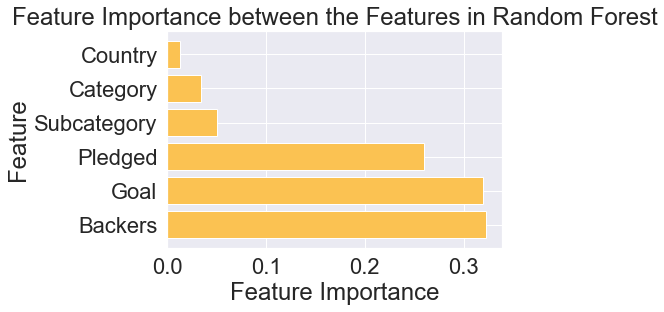

In [153]:
# Create plot
plt.barh(range(X.shape[1]), importances[indices],color='#FBC252')
plt.title("Feature Importance between the Features in Random Forest")
plt.yticks(range(X.shape[1]), names)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.show()

In [154]:
# The value of Feature Importance
feature_names=pd.DataFrame(gradient_boosting.feature_importances_,index=X.columns, columns=['State'])
feature_names.sort_values(by="State",ascending=False)

,State
Goal,0.395631
Pledged,0.339173
Backers,0.225205
Category,0.023229
Country,0.010948
Subcategory,0.005813


In [155]:
# Get feature importances
importances = gradient_boosting.feature_importances_

In [156]:
feature_names = X.columns

In [157]:
# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

In [158]:
# Rearrange feature names so they match the sorted feature importances
names = [feature_names[i] for i in indices]

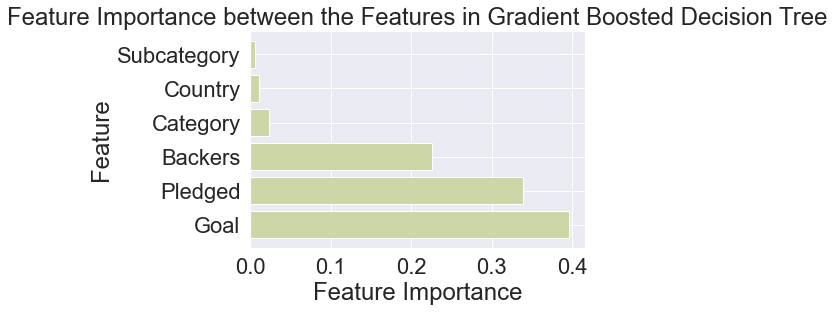

In [159]:
# Create plot
plt.barh(range(X.shape[1]), importances[indices],color='#CCD6A6')
plt.title("Feature Importance between the Features in Gradient Boosted Decision Tree")
plt.yticks(range(X.shape[1]), names)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.show()